In [1]:
import cv2 as cv
import numpy as np



/tmp/ipykernel_5260/3182539278.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(), 256, [0, 256])


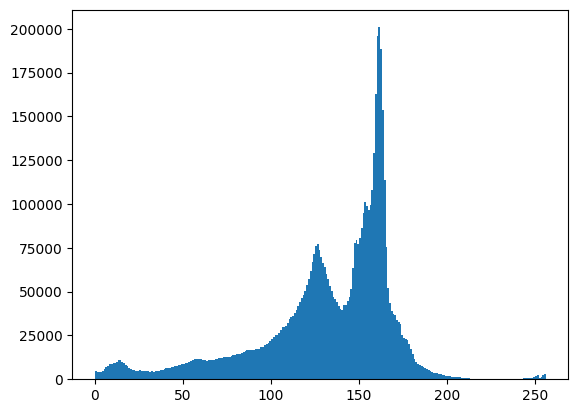

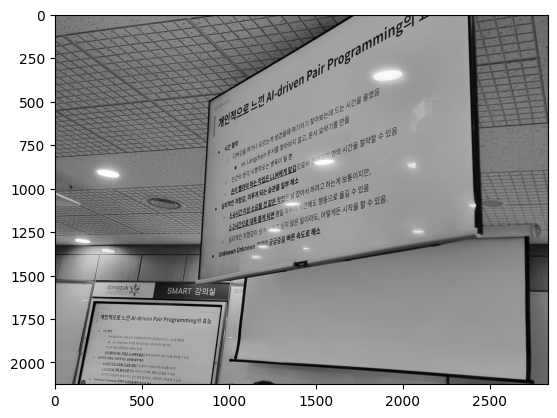

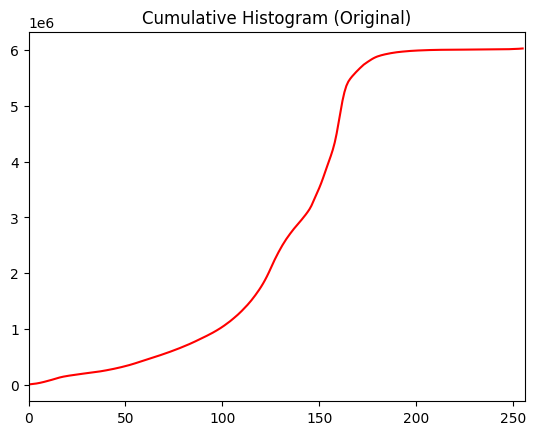

OpenCV PSNR:361.20199909921956


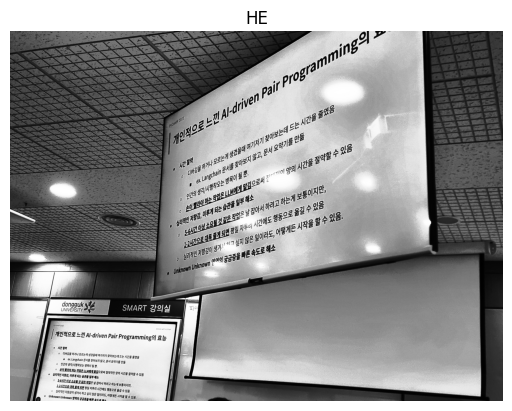

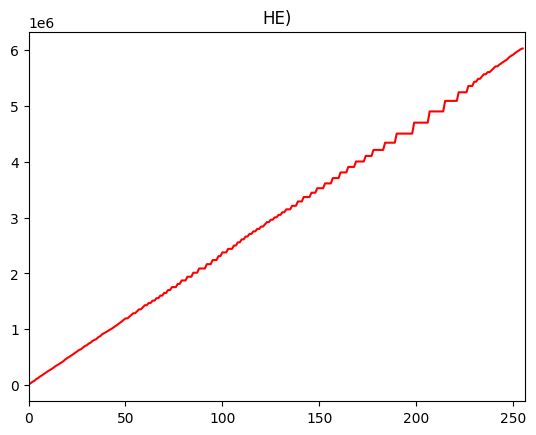

OpenCV PSNR:15.707339316995242


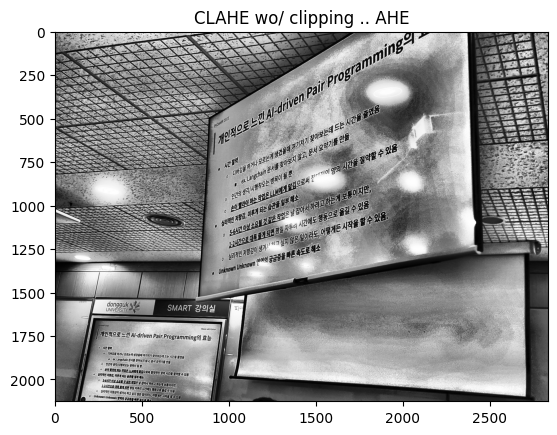

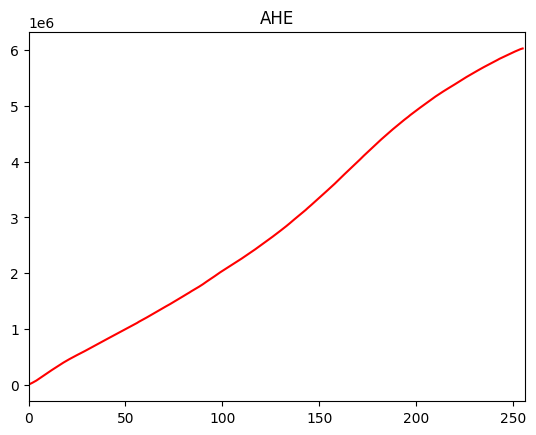

OpenCV PSNR:14.860462023968282


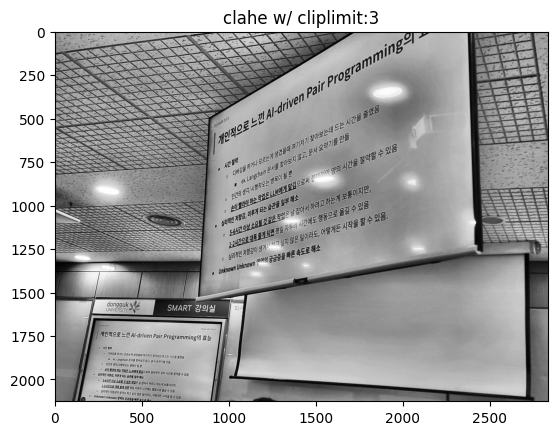

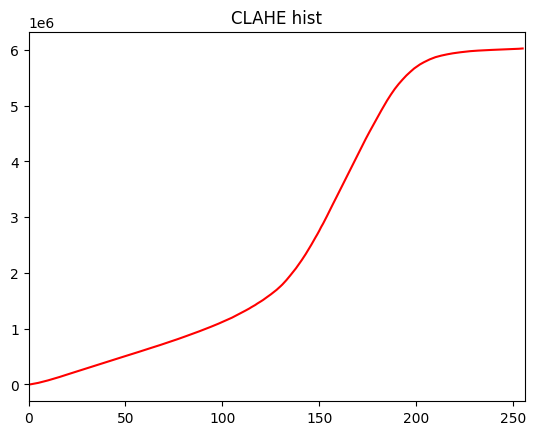

OpenCV PSNR:20.018064517746875


In [5]:
from matplotlib import pyplot as plt

img = cv.imread("20250817_142019.jpg", cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

plt.hist(img.ravel(), 256, [0, 256])
plt.show()

plt.imshow(img, cmap='gray')
plt.show()

# 히스토그램 
def plot_cumulative_histogram(image, title='Cumulative Histogram'):
    hist = cv.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist.cumsum(), color='red')
    plt.title(title)
    plt.xlim([0, 256])
    plt.show()
    print(f'OpenCV PSNR:{cv.PSNR(img, image)}')

# 원본 이미지 누적 히스토그램
plot_cumulative_histogram(img, 'Cumulative Histogram (Original)')

# HE
equalized_img = cv.equalizeHist(img)
plt.imshow(equalized_img, cmap='gray')
plt.title('HE')
plt.axis('off')
plt.show()
# HE 이미지 누적 히스토그램
plot_cumulative_histogram(equalized_img, 'HE)')

#AHE
ahe_simulated_obj = cv.createCLAHE(clipLimit=0)
ahe_simulated_img = ahe_simulated_obj.apply(img)
plt.imshow(ahe_simulated_img, cmap='gray')
plt.title('CLAHE wo/ clipping .. AHE')
plt.show()
plot_cumulative_histogram(ahe_simulated_img, 'AHE')

cliplimit = 3
clahe_simulated_obj = cv.createCLAHE(clipLimit=cliplimit)
clahe_simulated_img = clahe_simulated_obj.apply(img)
plt.imshow(clahe_simulated_img, cmap='gray')
plt.title(f'clahe w/ cliplimit:{cliplimit}')
plt.show()

# ahe_simulated 이미지 누적 히스토그램
plot_cumulative_histogram(clahe_simulated_img, 'CLAHE hist')
